In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
ids = test['id']
df = pd.concat([train, test])

In [8]:
df = df.drop(columns = ['id'])

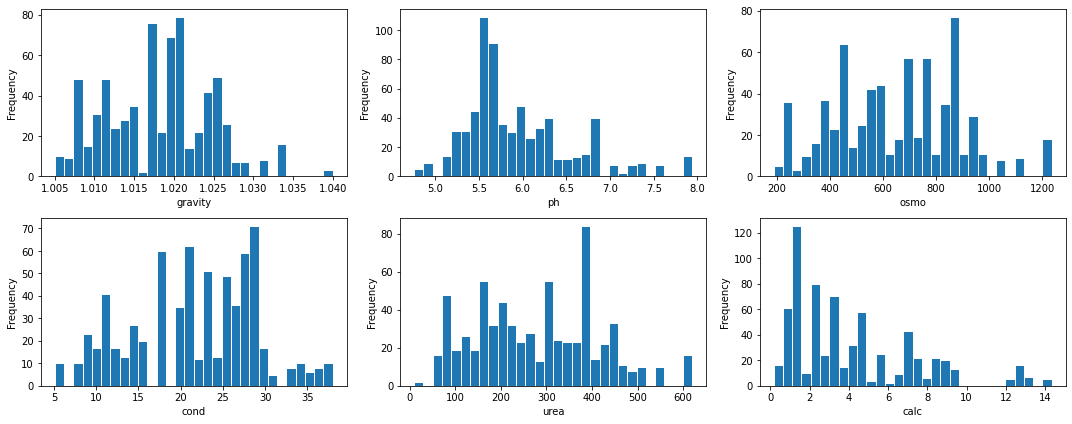

In [14]:
fig, axes = plt.subplots(2, 3, figsize=(15, 6))
axes = axes.flatten()
axes[0].set_ylabel('Percent')
axes[3].set_ylabel('Percent')
    
for j, col in enumerate(df.columns[:-1]):
    
    df[col].plot.hist(ax = axes[j], bins = 30, edgecolor='white')
    axes[j].set_xlabel(col)
    
plt.tight_layout()

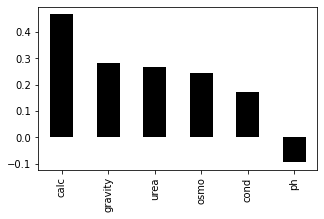

In [16]:
df.corr()['target'].sort_values(ascending=False)[1:].plot.bar(figsize=(5,3), cmap='copper')
plt.show()

In [17]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

X = df.drop(columns='target')
y = df['target']

features = X.columns.values

Scaler = MinMaxScaler()
Scaler.fit(X)
X = Scaler.transform(X)

X = pd.DataFrame(X, columns = features)

X_test = X[len(train):]
X = X.iloc[:len(train)]
y = y.iloc[:len(train)]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3)

In [18]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_train_pred = model_lr.predict(X_train)
y_valid_pred = model_lr.predict(X_valid)

print("Training score: ", metrics.f1_score(y_train, y_train_pred))
print("Validation score: ", metrics.f1_score(y_valid, y_valid_pred))

Training score:  0.6887966804979253
Validation score:  0.6086956521739131


In [19]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_valid)

print("Training score: ", metrics.f1_score(y_train, y_train_pred))
print("Validation score: ", metrics.f1_score(y_valid, y_valid_pred))

Training score:  1.0
Validation score:  0.5979381443298969


In [23]:
final_model = LogisticRegression()
model.fit(X, y)
print("Training score: ", metrics.f1_score(y, model.predict(X)))
y_test_pred = model.predict(X_test)

Training score:  1.0


In [24]:
output = pd.DataFrame({'id': ids, 'target': y_test_pred})

In [26]:
output.to_csv("Submission2.csv", index=False)